# get gene coverage for all the TARA runs

In [4]:
import pandas as pd

In [9]:
#list run ids
run_keys = pd.read_csv("runs_samples_keys.csv")
print(len(run_keys))
run_keys.head()

243


,run_id,tara_label
0,ERR599095,TARA_004_DCM_0.22-1.6
1,ERR598955,TARA_004_SRF_0.22-1.6
2,ERR315856,TARA_007_DCM_0.22-1.6
3,ERR315857,TARA_007_SRF_0.22-1.6
4,ERR594329,TARA_009_DCM_0.22-1.6


In [22]:
coverage = pd.DataFrame()

for run_id in run_keys['run_id']:
    print("processing run", run_id, "...")
    #read in genes file
    genes_path = '~/Projects/SAR86/satellite_models/get_gene_data/sar86_genes/'
    file_name = run_id+'.SAR86.genes'
    try:
        cnv = pd.read_csv(genes_path+file_name,delimiter='\t')
        #drop copy_number column 
        cnv = cnv.drop('copy_number', axis=1)
        #pivot dataframe
        cnv['index'] = run_id 
        pivoted = cnv.pivot(index='index',columns='gene_id',values='coverage')
        #append to copy_number dataframe
        if len(coverage)==0:
            coverage = pivoted
        else:
            coverage = coverage.append(pivoted)
    except FileNotFoundError:
        print("file",run_id,";",run_keys[run_keys['run_id']==run_id]['tara_label'].to_string(index=False),"not found, skipping")

print(coverage.shape)
coverage.head()

processing run ERR599095 ...
processing run ERR598955 ...
processing run ERR315856 ...
processing run ERR315857 ...
processing run ERR594329 ...
processing run ERR594288 ...
processing run ERR599092 ...
processing run ERR594352 ...
file ERR594352 ; TARA_018_DCM_<-0.22 not found, skipping
processing run ERR598993 ...
processing run ERR594358 ...
file ERR594358 ; TARA_018_SRF_<-0.22 not found, skipping
processing run ERR594378 ...
file ERR594378 ; TARA_022_SRF_<-0.22 not found, skipping
processing run ERR315859 ...
processing run ERR594408 ...
file ERR594408 ; TARA_023_DCM_<-0.22 not found, skipping
processing run ERR315858 ...
processing run ERR599094 ...
processing run ERR594375 ...
file ERR594375 ; TARA_025_DCM_<-0.22 not found, skipping
processing run ERR599043 ...
processing run ERR594396 ...
file ERR594396 ; TARA_025_SRF_<-0.22 not found, skipping
processing run ERR318620 ...
processing run ERR594405 ...
file ERR594405 ; TARA_030_DCM_<-0.22 not found, skipping
processing run ERR315

gene_id,fig|1123864.3.peg.102|VBISARClu237429_0102|,fig|1123864.3.peg.103|VBISARClu237429_0103|,fig|1123864.3.peg.105|VBISARClu237429_0105|,fig|1123864.3.peg.106|VBISARClu237429_0106|,fig|1123864.3.peg.108|VBISARClu237429_0108|,fig|1123864.3.peg.109|VBISARClu237429_0109|,fig|1123864.3.peg.111|VBISARClu237429_0111|,fig|1123864.3.peg.112|VBISARClu237429_0112|,fig|1123864.3.peg.115|VBISARClu237429_0115|,fig|1123864.3.peg.116|VBISARClu237429_0116|,...,scf7180009409913_26157_27140_26,scf7180009409913_27144_28913_27,scf7180009409913_28976_30082_28,scf7180009409913_30060_31295_29,scf7180009409913_31282_32319_30,scf7180009409913_32383_33123_31,scf7180009409913_33125_33334_32,scf7180009409913_4750_2468_4,scf7180009409913_5274_4753_5,scf7180009409913_5681_8779_6
index,,,,,,,,,,,,,,,,,,,,,
ERR599095,0.0,0.23962,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,14.436992,8.337288,14.961156,20.581715,13.420039,13.893387,0.295238,1.608410,2.340996,0.539206
ERR598955,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,2.073171,1.816384,2.308943,2.024272,0.972062,2.631579,0.000000,0.395094,0.000000,0.000000
ERR315856,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,3.954268,6.020339,4.606143,3.810680,4.191715,3.398111,0.380952,1.406045,1.591954,0.200065
ERR315857,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,1.669715,1.261017,1.095754,1.891586,1.292871,0.516869,0.000000,0.317565,0.000000,0.000000
ERR594329,0.0,0.00000,0.0,0.071038,0.0,0.0,0.0,0.0,0.429224,0.0,...,17.965447,12.602825,10.420958,15.623786,14.215800,15.604588,0.000000,2.887429,4.340996,0.312036


In [24]:
coverage.shape

(198, 51711)

In [11]:
coverage.to_csv('GeneCoverageMatrix.csv',index_label="run_id")

# normalize coverage to scale to 1 for each TARA site

(divide each row by the row's mean)

In [25]:
def scale_rows_to_one(df):
    #mean of each row if axis is 1, mean of each column if axis is 0
    rowmeans = df.mean(axis=1, skipna=True)
    #divide each row by its mean
    norm = df.div(rowmeans, axis=0)
    return norm

In [26]:
normalized = scale_rows_to_one(df=coverage)
normalized.head()

gene_id,fig|1123864.3.peg.102|VBISARClu237429_0102|,fig|1123864.3.peg.103|VBISARClu237429_0103|,fig|1123864.3.peg.105|VBISARClu237429_0105|,fig|1123864.3.peg.106|VBISARClu237429_0106|,fig|1123864.3.peg.108|VBISARClu237429_0108|,fig|1123864.3.peg.109|VBISARClu237429_0109|,fig|1123864.3.peg.111|VBISARClu237429_0111|,fig|1123864.3.peg.112|VBISARClu237429_0112|,fig|1123864.3.peg.115|VBISARClu237429_0115|,fig|1123864.3.peg.116|VBISARClu237429_0116|,...,scf7180009409913_26157_27140_26,scf7180009409913_27144_28913_27,scf7180009409913_28976_30082_28,scf7180009409913_30060_31295_29,scf7180009409913_31282_32319_30,scf7180009409913_32383_33123_31,scf7180009409913_33125_33334_32,scf7180009409913_4750_2468_4,scf7180009409913_5274_4753_5,scf7180009409913_5681_8779_6
index,,,,,,,,,,,,,,,,,,,,,
ERR599095,0.0,0.020067,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,1.209019,0.698202,1.252915,1.723606,1.123855,1.163495,0.024725,0.134696,0.196046,0.045156
ERR598955,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.189152,0.165724,0.210664,0.184691,0.088689,0.240100,0.000000,0.036048,0.000000,0.000000
ERR315856,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.894844,1.362393,1.042362,0.862350,0.948578,0.768987,0.086209,0.318186,0.360257,0.045274
ERR315857,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.113213,0.085502,0.074296,0.128256,0.087661,0.035046,0.000000,0.021532,0.000000,0.000000
ERR594329,0.0,0.000000,0.0,0.008171,0.0,0.0,0.0,0.0,0.049371,0.0,...,2.066458,1.449628,1.198661,1.797111,1.635159,1.794903,0.000000,0.332124,0.499319,0.035892


In [27]:
normalized.shape

(198, 51711)

In [28]:
normalized.to_csv("GeneCoverageMatrix_Normalized.csv")

### make some histograms of per-sample gene depth

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([526., 506., 460., 408., 401., 511., 478., 403., 206., 145., 152.,
        107.,  90.,  79.,  95.,  68.,  89.,  98., 106., 120., 147., 151.,
        167., 199., 216., 221., 193., 186., 156., 104.,  80.,  59.,  47.,
         37.,  39.,  26.,  19.,  27.,  15.,  14.,  14.,   5.,   7.,   5.,
          6.,   4.,   1.,   2.,   1.,   5.]),
 array([ 1.5 ,  1.87,  2.24,  2.61,  2.98,  3.35,  3.72,  4.09,  4.46,
         4.83,  5.2 ,  5.57,  5.94,  6.31,  6.68,  7.05,  7.42,  7.79,
         8.16,  8.53,  8.9 ,  9.27,  9.64, 10.01, 10.38, 10.75, 11.12,
        11.49, 11.86, 12.23, 12.6 , 12.97, 13.34, 13.71, 14.08, 14.45,
        14.82, 15.19, 15.56, 15.93, 16.3 , 16.67, 17.04, 17.41, 17.78,
        18.15, 18.52, 18.89, 19.26, 19.63, 20.  ]),
 <a list of 50 Patch objects>)

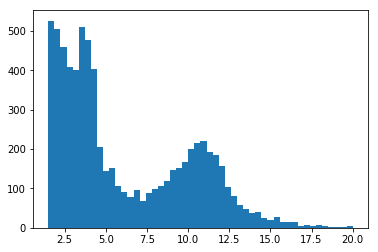

In [30]:
plt.hist(normalized.loc['ERR598993',:], bins=50, range=(1.5,20))

In [32]:
run_keys[run_keys['run_id']=='ERR598993']

,run_id,tara_label
8,ERR598993,TARA_018_SRF_0.22-1.6


(array([905., 603., 530., 461., 453., 405., 497., 510., 417., 233., 152.,
        159., 109.,  92.,  82.,  98.,  73.,  89., 102., 111., 126., 143.,
        180., 185., 190., 230., 207., 220., 158., 138., 108.,  73.,  44.,
         46.,  44.,  26.,  22.,  21.,  20.,  14.,  17.,   7.,   7.,   6.,
          6.,   3.,   2.,   2.,   1.,   5.]),
 array([ 1.  ,  1.38,  1.76,  2.14,  2.52,  2.9 ,  3.28,  3.66,  4.04,
         4.42,  4.8 ,  5.18,  5.56,  5.94,  6.32,  6.7 ,  7.08,  7.46,
         7.84,  8.22,  8.6 ,  8.98,  9.36,  9.74, 10.12, 10.5 , 10.88,
        11.26, 11.64, 12.02, 12.4 , 12.78, 13.16, 13.54, 13.92, 14.3 ,
        14.68, 15.06, 15.44, 15.82, 16.2 , 16.58, 16.96, 17.34, 17.72,
        18.1 , 18.48, 18.86, 19.24, 19.62, 20.  ]),
 <a list of 50 Patch objects>)

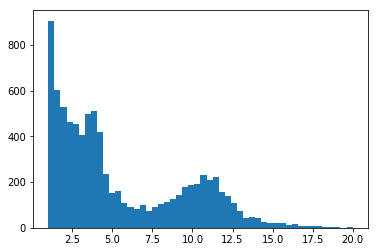

In [33]:
plt.hist(normalized.loc['ERR598993',:], bins=50, range=(1,20))

(array([500., 434., 391., 405., 373., 346., 377., 376., 394., 371., 420.,
        369., 312., 262., 228., 147., 126., 104.,  87.,  78.,  78.,  61.,
         67.,  67.,  68.,  41.,  48.,  52.,  55.,  46.,  49.,  35.,  42.,
         48.,  41.,  48.,  36.,  43.,  28.,  35.,  29.,  30.,  25.,  17.,
         14.,  15.,  11.,   8.,   4.,   5.]),
 array([ 2.  ,  2.36,  2.72,  3.08,  3.44,  3.8 ,  4.16,  4.52,  4.88,
         5.24,  5.6 ,  5.96,  6.32,  6.68,  7.04,  7.4 ,  7.76,  8.12,
         8.48,  8.84,  9.2 ,  9.56,  9.92, 10.28, 10.64, 11.  , 11.36,
        11.72, 12.08, 12.44, 12.8 , 13.16, 13.52, 13.88, 14.24, 14.6 ,
        14.96, 15.32, 15.68, 16.04, 16.4 , 16.76, 17.12, 17.48, 17.84,
        18.2 , 18.56, 18.92, 19.28, 19.64, 20.  ]),
 <a list of 50 Patch objects>)

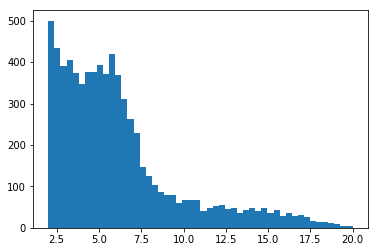

In [34]:
plt.hist(normalized.loc['ERR315859',:], bins=50, range=(2,20))

(array([1037.,  859.,  655.,  500.,  430.,  408.,  431.,  363.,  385.,
         396.,  415.,  394.,  436.,  387.,  337.,  264.,  225.,  165.,
         116.,  109.,   83.,   83.,   68.,   72.,   74.,   68.,   47.,
          50.,   57.,   51.,   54.,   53.,   37.,   47.,   48.,   40.,
          54.,   37.,   38.,   33.,   37.,   28.,   33.,   21.,   15.,
          14.,   15.,    8.,    4.,    5.]),
 array([ 1.  ,  1.38,  1.76,  2.14,  2.52,  2.9 ,  3.28,  3.66,  4.04,
         4.42,  4.8 ,  5.18,  5.56,  5.94,  6.32,  6.7 ,  7.08,  7.46,
         7.84,  8.22,  8.6 ,  8.98,  9.36,  9.74, 10.12, 10.5 , 10.88,
        11.26, 11.64, 12.02, 12.4 , 12.78, 13.16, 13.54, 13.92, 14.3 ,
        14.68, 15.06, 15.44, 15.82, 16.2 , 16.58, 16.96, 17.34, 17.72,
        18.1 , 18.48, 18.86, 19.24, 19.62, 20.  ]),
 <a list of 50 Patch objects>)

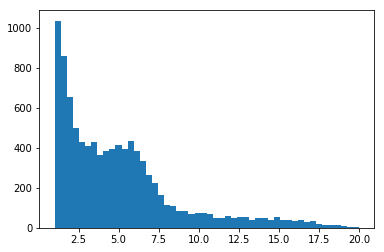

In [36]:
plt.hist(normalized.loc['ERR315859',:], bins=50, range=(1,20))

(array([597., 559., 502., 465., 417., 408., 358., 336., 313., 270., 275.,
        262., 219., 217., 171., 143., 129., 143., 110.,  95., 104.,  82.,
         77.,  62.,  60.,  44.,  36.,  49.,  57.,  49.,  59.,  46.,  42.,
         46.,  35.,  32.,  37.,  54.,  42.,  40.,  38.,  33.,  33.,  25.,
         19.,  23.,  14.,  12.,   9.,  15.]),
 array([ 2.  ,  2.36,  2.72,  3.08,  3.44,  3.8 ,  4.16,  4.52,  4.88,
         5.24,  5.6 ,  5.96,  6.32,  6.68,  7.04,  7.4 ,  7.76,  8.12,
         8.48,  8.84,  9.2 ,  9.56,  9.92, 10.28, 10.64, 11.  , 11.36,
        11.72, 12.08, 12.44, 12.8 , 13.16, 13.52, 13.88, 14.24, 14.6 ,
        14.96, 15.32, 15.68, 16.04, 16.4 , 16.76, 17.12, 17.48, 17.84,
        18.2 , 18.56, 18.92, 19.28, 19.64, 20.  ]),
 <a list of 50 Patch objects>)

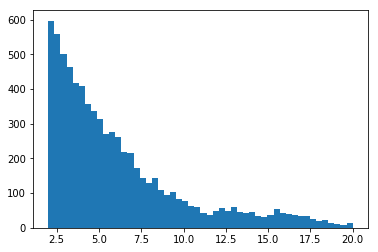

In [37]:
plt.hist(normalized.loc['ERR315858',:], bins=50, range=(2,20))

In [38]:
run_keys['run_id']

0      ERR599095
1      ERR598955
2      ERR315856
3      ERR315857
4      ERR594329
5      ERR594288
6      ERR599092
7      ERR594352
8      ERR598993
9      ERR594358
10     ERR594378
11     ERR315859
12     ERR594408
13     ERR315858
14     ERR599094
15     ERR594375
16     ERR599043
17     ERR594396
18     ERR318620
19     ERR594405
20     ERR315862
21     ERR599106
22     ERR594410
23     ERR599097
24     ERR594360
25     ERR599116
26     ERR594393
27     ERR599049
28     ERR599111
29     ERR594390
         ...    
213    ERR599142
214    ERR598942
215    ERR599115
216    ERR599052
217    ERR599099
218    ERR599127
219    ERR598989
220    ERR599087
221    ERR599051
222    ERR599030
223    ERR599162
224    ERR599029
225    ERR599100
226    ERR598985
227    ERR599136
228    ERR599166
229    ERR598983
230    ERR599047
231    ERR598968
232    ERR599123
233    ERR598958
234    ERR598964
235    ERR598963
236    ERR598996
237    ERR599170
238    ERR598986
239    ERR598976
240    ERR5989

In [39]:
plt.hist(normalized.loc['ERR315861',:], bins=50, range=(1,20))

KeyError: 'the label [ERR315861] is not in the [index]'

(array([ 760.,  650.,  571.,  472.,  403.,  406.,  429.,  440.,  425.,
         414.,  395.,  344.,  294.,  272.,  227.,  216.,  213.,  180.,
         165.,  129.,  110.,  115.,  102.,   74.,   61.,   57.,   50.,
          61.,   69.,   67.,   70.,   83.,   80.,   76.,   54.,   60.,
          55.,   54.,   42.,   35.,   33.,   28.,   21.,   21.,   14.,
          17.,   10.,    7.,   10.,    5.]),
 array([  1.  ,   1.38,   1.76,   2.14,   2.52,   2.9 ,   3.28,   3.66,
          4.04,   4.42,   4.8 ,   5.18,   5.56,   5.94,   6.32,   6.7 ,
          7.08,   7.46,   7.84,   8.22,   8.6 ,   8.98,   9.36,   9.74,
         10.12,  10.5 ,  10.88,  11.26,  11.64,  12.02,  12.4 ,  12.78,
         13.16,  13.54,  13.92,  14.3 ,  14.68,  15.06,  15.44,  15.82,
         16.2 ,  16.58,  16.96,  17.34,  17.72,  18.1 ,  18.48,  18.86,
         19.24,  19.62,  20.  ]),
 <a list of 50 Patch objects>)

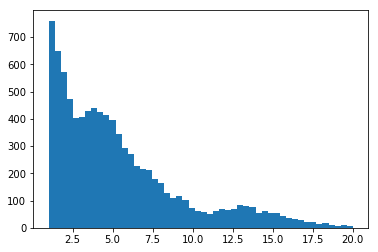

In [128]:
plt.hist(normalized.loc['ERR598951',:], bins=50, range=(1,20))

(array([1144.,  755.,  774.,  620.,  381.,  349.,  368.,  430.,  491.,
         448.,  483.,  376.,  374.,  300.,  287.,  216.,  208.,  184.,
         204.,  163.,  168.,  124.,   71.,   56.,   51.,   57.,   75.,
          61.,   71.,   69.,   78.,   72.,   80.,   74.,   72.,   79.,
          84.,   58.,   47.,   32.,   16.,   20.,   21.,   18.,   10.,
           7.,    8.,   14.,    4.,    3.]),
 array([ 0.6  ,  0.988,  1.376,  1.764,  2.152,  2.54 ,  2.928,  3.316,
         3.704,  4.092,  4.48 ,  4.868,  5.256,  5.644,  6.032,  6.42 ,
         6.808,  7.196,  7.584,  7.972,  8.36 ,  8.748,  9.136,  9.524,
         9.912, 10.3  , 10.688, 11.076, 11.464, 11.852, 12.24 , 12.628,
        13.016, 13.404, 13.792, 14.18 , 14.568, 14.956, 15.344, 15.732,
        16.12 , 16.508, 16.896, 17.284, 17.672, 18.06 , 18.448, 18.836,
        19.224, 19.612, 20.   ]),
 <a list of 50 Patch objects>)

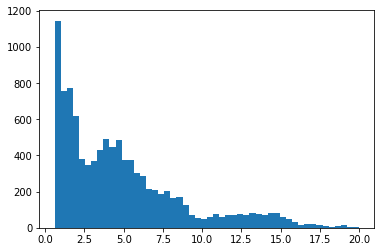

In [40]:
plt.hist(normalized.loc['ERR599043',:], bins=50, range=(0.6,20))

In [42]:
run_keys[run_keys['tara_label']=='TARA_030_DCM_0.22-1.6']

,run_id,tara_label
18,ERR318620,TARA_030_DCM_0.22-1.6


(array([854., 766., 816., 715., 590., 464., 390., 438., 467., 550., 580.,
        536., 426., 408., 322., 283., 229., 236., 227., 214., 223., 204.,
        204., 168., 110.,  61.,  35.,  15.,   6.,   9.,   1.,   1.,   1.,
          0.,   1.,   0.,   2.,   1.,   1.,   2.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.,   1.,   1.,   0.]),
 array([ 1.  ,  1.38,  1.76,  2.14,  2.52,  2.9 ,  3.28,  3.66,  4.04,
         4.42,  4.8 ,  5.18,  5.56,  5.94,  6.32,  6.7 ,  7.08,  7.46,
         7.84,  8.22,  8.6 ,  8.98,  9.36,  9.74, 10.12, 10.5 , 10.88,
        11.26, 11.64, 12.02, 12.4 , 12.78, 13.16, 13.54, 13.92, 14.3 ,
        14.68, 15.06, 15.44, 15.82, 16.2 , 16.58, 16.96, 17.34, 17.72,
        18.1 , 18.48, 18.86, 19.24, 19.62, 20.  ]),
 <a list of 50 Patch objects>)

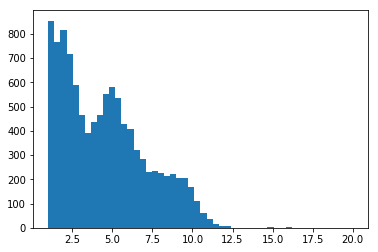

In [43]:
plt.hist(normalized.loc['ERR318620',:], bins=50, range=(1,20))

(array([1.971e+03, 1.020e+03, 8.050e+02, 8.240e+02, 8.250e+02, 6.460e+02,
        5.350e+02, 4.290e+02, 4.260e+02, 4.780e+02, 5.240e+02, 5.990e+02,
        5.740e+02, 4.730e+02, 4.230e+02, 3.440e+02, 2.920e+02, 2.430e+02,
        2.410e+02, 2.350e+02, 2.200e+02, 2.300e+02, 2.200e+02, 1.970e+02,
        1.650e+02, 1.030e+02, 6.300e+01, 2.500e+01, 1.400e+01, 5.000e+00,
        6.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00]),
 array([ 0.37  ,  0.7626,  1.1552,  1.5478,  1.9404,  2.333 ,  2.7256,
         3.1182,  3.5108,  3.9034,  4.296 ,  4.6886,  5.0812,  5.4738,
         5.8664,  6.259 ,  6.6516,  7.0442,  7.4368,  7.8294,  8.222 ,
         8.6146,  9.0072,  9.3998,  9.7924, 10.185 , 10.5776, 10.9702,
        11.3628, 11.7554, 12.148 , 12.5406, 12.9332, 13.3258, 13.7184,
        14.111 , 14.5

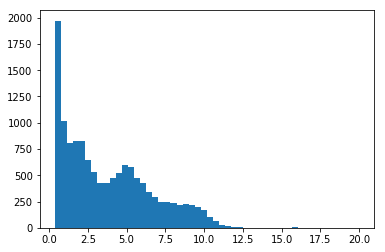

In [46]:
plt.hist(normalized.loc['ERR318620',:], bins=50, range=(0.37,20))

(array([1751., 1184.,  900.,  835.,  677.,  595.,  524.,  459.,  398.,
         377.,  317.,  298.,  272.,  279.,  231.,  184.,  196.,  199.,
         173.,  142.,  139.,  129.,  113.,   99.,  108.,   91.,   79.,
          67.,   66.,   63.,   54.,   54.,   51.,   42.,   36.,   34.,
          37.,   32.,   22.,   17.,   10.,   18.,   14.,   18.,   23.,
          17.,   16.,   12.,   16.,    6.]),
 array([ 0.37  ,  0.7626,  1.1552,  1.5478,  1.9404,  2.333 ,  2.7256,
         3.1182,  3.5108,  3.9034,  4.296 ,  4.6886,  5.0812,  5.4738,
         5.8664,  6.259 ,  6.6516,  7.0442,  7.4368,  7.8294,  8.222 ,
         8.6146,  9.0072,  9.3998,  9.7924, 10.185 , 10.5776, 10.9702,
        11.3628, 11.7554, 12.148 , 12.5406, 12.9332, 13.3258, 13.7184,
        14.111 , 14.5036, 14.8962, 15.2888, 15.6814, 16.074 , 16.4666,
        16.8592, 17.2518, 17.6444, 18.037 , 18.4296, 18.8222, 19.2148,
        19.6074, 20.    ]),
 <a list of 50 Patch objects>)

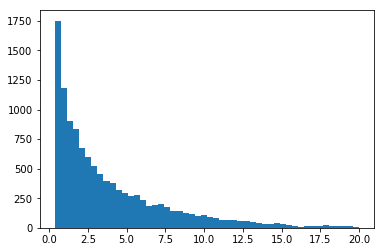

In [47]:
plt.hist(normalized.loc['ERR315862',:], bins=50, range=(0.37,20))

(array([967., 854., 729., 600., 568., 463., 439., 369., 336., 299., 279.,
        271., 262., 212., 178., 189., 198., 164., 138., 133., 127., 115.,
         97.,  94.,  92.,  80.,  70.,  68.,  55.,  57.,  54.,  51.,  45.,
         32.,  40.,  29.,  35.,  27.,  18.,  17.,  14.,  13.,  19.,  16.,
         22.,  16.,  14.,  12.,  15.,   6.]),
 array([ 1.  ,  1.38,  1.76,  2.14,  2.52,  2.9 ,  3.28,  3.66,  4.04,
         4.42,  4.8 ,  5.18,  5.56,  5.94,  6.32,  6.7 ,  7.08,  7.46,
         7.84,  8.22,  8.6 ,  8.98,  9.36,  9.74, 10.12, 10.5 , 10.88,
        11.26, 11.64, 12.02, 12.4 , 12.78, 13.16, 13.54, 13.92, 14.3 ,
        14.68, 15.06, 15.44, 15.82, 16.2 , 16.58, 16.96, 17.34, 17.72,
        18.1 , 18.48, 18.86, 19.24, 19.62, 20.  ]),
 <a list of 50 Patch objects>)

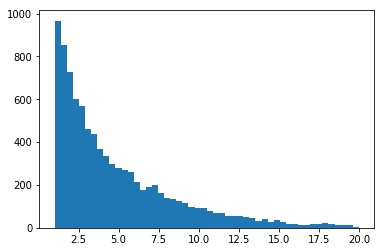

In [49]:
plt.hist(normalized.loc['ERR315862',:], bins=50, range=(1,20))

In [50]:
import numpy as np

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.000e+00,
        2.400e+01, 9.500e+01, 2.410e+02, 4.290e+02, 6.050e+02, 8.170e+02,
        8.760e+02, 1.024e+03, 1.025e+03, 1.077e+03, 1.001e+03, 8.890e+02,
        9.460e+02, 8.750e+02, 8.800e+02, 9.240e+02, 9.490e+02, 9.690e+02,
        1.027e+03, 1.241e+03, 1.452e+03, 1.533e+03, 1.517e+03, 1.432e+03,
        1.107e+03, 5.760e+02, 2.160e+02, 7.200e+01, 1.200e+01, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00]),
 array([-10. ,  -9.6,  -9.2,  -8.8,  -8.4,  -8. ,  -7.6,  -7.2,  -6.8,
         -6.4,  -6. ,  -5.6,  -5.2,  -4.8,  -4.4,  -4. ,  -3.6,  -3.2,
         -2.8,  -2.4,  -2. ,  -1.6,  -1.2,  -0.8,  -0.4,   0. ,   0.4,
          0.8,   1.2,   1.6,   2. ,   2.4,   2.8,   3.2,   3.6,   4. ,
          4.4,   4.8,   5.2,   5.6,   6. ,   6.4,   6.8,   7.2,   7.6,
          8. ,   8.4,

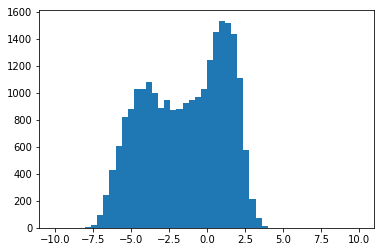

In [51]:
plt.hist(np.log(normalized.loc['ERR315862',:]+0.00000000000001), bins=50, range=(-10,10))

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   6.00000000e+00,
          2.40000000e+01,   9.50000000e+01,   2.41000000e+02,
          4.29000000e+02,   6.05000000e+02,   8.17000000e+02,
          8.76000000e+02,   1.02400000e+03,   1.02500000e+03,
          1.07700000e+03,   1.00100000e+03,   8.89000000e+02,
          9.46000000e+02,   8.75000000e+02,   8.80000000e+02,
          9.24000000e+02,   9.49000000e+02,   9.69000000e+02,
          1.02700000e+03,   1.24100000e+03,   1.45200000e+03,
          1.53300000e+03,   1.51700000e+03,   1.43200000e+03,
          1.10700000e+03,   5.76000000e+02,   2.16000000e+02,
          7.20000000e+01,   1.20000000e+01,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

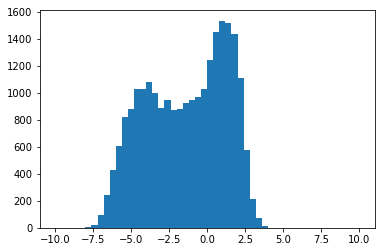

In [148]:
plt.hist(np.log(normalized.loc['ERR315862',:]+0.00000000000001), bins=50, range=(-10,10))

(array([ 480.,  495.,  602.,  693.,  647.,  718.,  733.,  787.,  749.,
         719.,  755.,  756.,  783.,  725.,  676.,  597.,  596.,  571.,
         630.,  689.,  677.,  558.,  530.,  422.,  449.,  449.,  517.,
         654.,  602.,  428.,  589.,  860., 1067.,  984.,  795.,  713.,
         330.,  451.,  451.,  108.,    7.,    5.,    0.,    2.,    0.,
           0.,    0.,    0.,    0.,    0.]),
 array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
        -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
        -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
         1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
         3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ]),
 <a list of 50 Patch objects>)

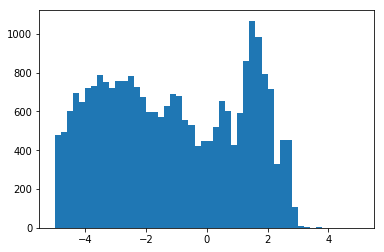

In [52]:
plt.hist(np.log(normalized.loc['ERR599043',:]+0.00000000000001), bins=50, range=(-5,5))

### okay so the cut off is not obvious

It looks to me like particularly where there's a really clear modal/bimodal/(trimodal?) distribution, a cutoff of e^-1 looks pretty good, like it more or less bisects the peak in the very small numbers (e^-3, e^-4...) and the definitely-signal peak in the higher numbers. But, sometimes it looks like it's closer to e^0, or could be a smaller number...

I'm going to go with a cutoff of e^-1 (=0.37).

(array([ 24.,  58., 111.,  93.,  95., 117.,  94.,  82.,  73.,  54.,  40.,
         35.,  35.,  29.,  26.,  22.,  10.,  18.,  10.,  12.,   8.,   7.,
          1.,   4.,   3.,   3.,   0.,   2.,   2.,   4.,   2.,   0.,   1.,
          1.,   1.,   1.,   1.,   2.,   3.,   1.,   0.,   2.,   0.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.]),
 array([ 0.37  ,  0.7626,  1.1552,  1.5478,  1.9404,  2.333 ,  2.7256,
         3.1182,  3.5108,  3.9034,  4.296 ,  4.6886,  5.0812,  5.4738,
         5.8664,  6.259 ,  6.6516,  7.0442,  7.4368,  7.8294,  8.222 ,
         8.6146,  9.0072,  9.3998,  9.7924, 10.185 , 10.5776, 10.9702,
        11.3628, 11.7554, 12.148 , 12.5406, 12.9332, 13.3258, 13.7184,
        14.111 , 14.5036, 14.8962, 15.2888, 15.6814, 16.074 , 16.4666,
        16.8592, 17.2518, 17.6444, 18.037 , 18.4296, 18.8222, 19.2148,
        19.6074, 20.    ]),
 <a list of 50 Patch objects>)

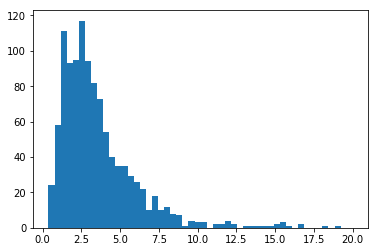

In [55]:
plt.hist(normalized.loc['ERR594312',:], bins=50, range=(0.37,20))

(array([6.678e+03, 4.288e+03, 2.779e+03, 1.973e+03, 1.392e+03, 8.870e+02,
        7.390e+02, 5.750e+02, 4.870e+02, 4.030e+02, 3.500e+02, 3.370e+02,
        2.990e+02, 3.040e+02, 2.830e+02, 2.740e+02, 2.430e+02, 2.240e+02,
        1.920e+02, 1.940e+02, 1.420e+02, 1.130e+02, 7.300e+01, 5.000e+01,
        4.000e+01, 2.700e+01, 1.700e+01, 1.000e+01, 1.200e+01, 7.000e+00,
        3.000e+00, 8.000e+00, 5.000e+00, 6.000e+00, 5.000e+00, 5.000e+00,
        4.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 3.000e+00]),
 array([ 0.37  ,  0.7626,  1.1552,  1.5478,  1.9404,  2.333 ,  2.7256,
         3.1182,  3.5108,  3.9034,  4.296 ,  4.6886,  5.0812,  5.4738,
         5.8664,  6.259 ,  6.6516,  7.0442,  7.4368,  7.8294,  8.222 ,
         8.6146,  9.0072,  9.3998,  9.7924, 10.185 , 10.5776, 10.9702,
        11.3628, 11.7554, 12.148 , 12.5406, 12.9332, 13.3258, 13.7184,
        14.111 , 14.5

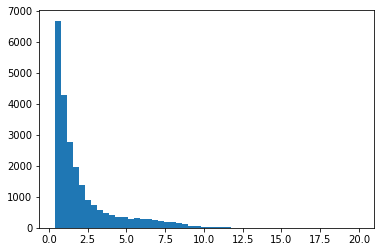

In [56]:
plt.hist(normalized.loc['ERR598982',:], bins=50, range=(0.37,20))

## convert to presence/absence

use 0.37 as cutoff at least initially (which is e^-1)

In [57]:
def binarize_matrix(df, threshold=0.37):
    new_df = df.copy()
    new_df[new_df > threshold] = 1
    new_df[new_df <= threshold] = 0
    return new_df

normalized_37 = binarize_matrix(normalized, threshold=0.37)
normalized_37.head()

gene_id,fig|1123864.3.peg.102|VBISARClu237429_0102|,fig|1123864.3.peg.103|VBISARClu237429_0103|,fig|1123864.3.peg.105|VBISARClu237429_0105|,fig|1123864.3.peg.106|VBISARClu237429_0106|,fig|1123864.3.peg.108|VBISARClu237429_0108|,fig|1123864.3.peg.109|VBISARClu237429_0109|,fig|1123864.3.peg.111|VBISARClu237429_0111|,fig|1123864.3.peg.112|VBISARClu237429_0112|,fig|1123864.3.peg.115|VBISARClu237429_0115|,fig|1123864.3.peg.116|VBISARClu237429_0116|,...,scf7180009409913_26157_27140_26,scf7180009409913_27144_28913_27,scf7180009409913_28976_30082_28,scf7180009409913_30060_31295_29,scf7180009409913_31282_32319_30,scf7180009409913_32383_33123_31,scf7180009409913_33125_33334_32,scf7180009409913_4750_2468_4,scf7180009409913_5274_4753_5,scf7180009409913_5681_8779_6
index,,,,,,,,,,,,,,,,,,,,,
ERR599095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
ERR598955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR315856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
ERR315857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR594329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


In [58]:
normalized.shape

(198, 51711)

In [59]:
normalized_37.to_csv("GeneCoverageMatrix_Normalized037_Binary.csv")